#### Using Azetrope data to estimate G$^{E}$ model parameters

At an azetrope the composition of component $i$ is equal in the vapor and liquid phases i.e., $x_{i}$ = $y_{i}$ for $i=1,2,\dots,\mathcal{M}$. This allows us to simplify the VLE equations (starting from mod Raoult's law) to:

\begin{equation}
\gamma_{i}=\frac{P}{P_{i}^{sat}}
\end{equation}

We can write $\gamma_{i}$ in terms of $G^{E}$ models, which have adjustable parameters. In the last example, we used an optimization routine to estimate model parameters, however we can use the azetrope condition. For example, for a two-suffix Margules model the azetrope condition gives: 

\begin{eqnarray}
\ln(\frac{P}{P_{1}^{sat}}) &=& \frac{A}{RT}x_{2}^{2}\\
\ln(\frac{P}{P_{2}^{sat}}) &=& \frac{A}{RT}x_{1}^{2}\\
\end{eqnarray}

which we can use to solve for the unknown parameter $A$. Let's compare values between the analytical method for estimating $A$ using the azetrope data, and the optimization based approach that we presented previously. 

In [3]:
# include my code ...
include("Include.jl");
include("Example.jl");

In [5]:
# compute the saturation pressures for my components Benzene(1)/Cyclohexane(2)
T_K = 283.15
sat_pressure_array = compute_saturation_pressure_array(T_K);

In [18]:
# The azetrope occured at P = 7.2 kPa and x1 ~ 0.46. Let's use these estimates to calculate A -
P_az = 7.2 # kPa
x1_az = 0.46 
A = ((R*T_K)/((1-x1_az)^2))*log(P_az/sat_pressure_array[1]) # J/mol

1407.6771866277477

#### Is the value of $A$ estimated from azetrope data sensitive to your estimates of $P_{az}$ and $x_{1,az}$?

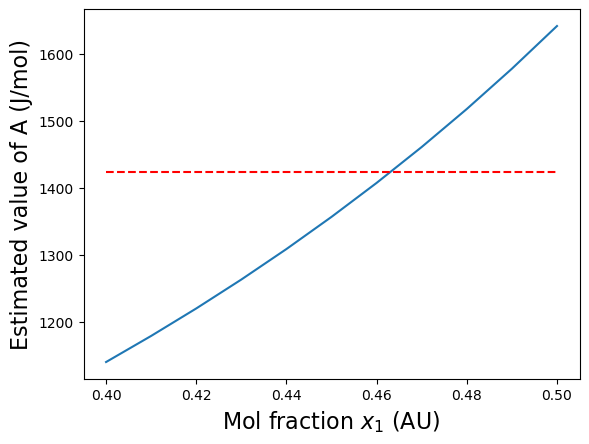

In [19]:
# show how estimates vary with changing x1 -
x1_az_test = collect(0.40:0.01:0.50)
A_x1_array = Float64[]
for x1_az in x1_az_test
    A_value = ((R*T_K)/((1-x1_az)^2))*log(P_az/sat_pressure_array[1])
    push!(A_x1_array,A_value)
end

# from last time -
A_P_optim = 1424.607737608114*ones(length(x1_az_test))


# plot -
plot(x1_az_test,A_x1_array)
plot(x1_az_test,A_P_optim,"r--")
xlabel(L"Mol fraction $x_{1}$ (AU)", fontsize=16);
ylabel("Estimated value of A (J/mol)", fontsize=16);

How does my estimate vary with error in the pressure measurement?

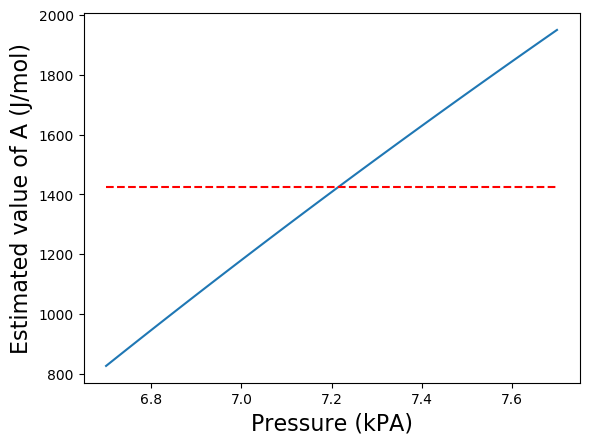

In [22]:
# show how estimates vary with changing P -
P_az_test = collect(6.7:0.01:7.7)
A_P_array = Float64[]
for P_az in P_az_test
    A_value = ((R*T_K)/((1-x1_az)^2))*log(P_az/sat_pressure_array[1])
    push!(A_P_array,A_value)
end

# from last time -
A_P_optim = 1424.607737608114*ones(length(P_az_test))

# plot -
plot(P_az_test,A_P_array)
plot(P_az_test,A_P_optim,"r--")
xlabel("Pressure (kPA)", fontsize=16);
ylabel("Estimated value of A (J/mol)", fontsize=16);